<a href="https://colab.research.google.com/github/Crackshaq/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = load_breast_cancer()
X, y = data.data, data.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
print("Linear Kernel Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))


svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
print("RBF Kernel Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))


Linear Kernel Accuracy: 0.956140350877193
RBF Kernel Accuracy: 0.9736842105263158


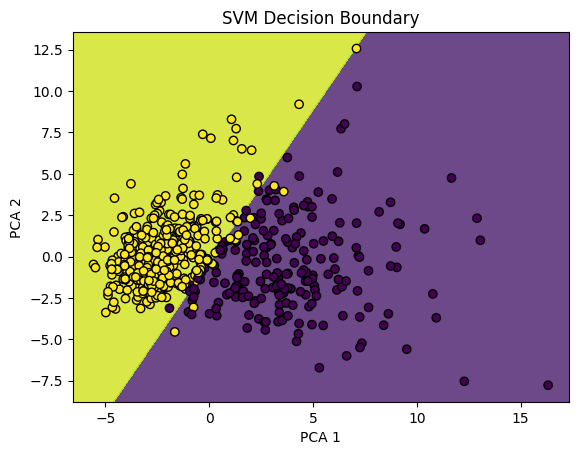

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

model = SVC(kernel='linear', C=1)
model.fit(X_reduced, y)


def plot_boundary(clf, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title("SVM Decision Boundary")
    plt.show()

plot_boundary(model, X_reduced, y)


In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.9736263736263737


In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X_scaled, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9736376339077782
